In [103]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'DeepMicroC-master'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME
!pip install cooler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/DeepMicroC-master
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.5 MB/s 
     |████████████████████████████████| 130 kB 39.5 MB/s 
     |████████████████████████████████| 65 kB 4.6 MB/s 
     |████████████████████████████████| 475 kB 46.3 MB/s 
     |████████████████████████████████| 102 kB 44.8 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp37-cp37m-linux_x86_64.whl size=1238256 sha256=7754fe5f5a739f8d8b0d5b75683eadff2232c9f77b1842c695826b0c60cb2f56
  Stored in directory: /root/.cache/pip/wheels/db/f0/a6/8d56aaec49585b245b0694bf8972e50a3b2a83331657ea7e95
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=53c0fc984ec1d101863db34f5496bfbd24cf71e8b6e1ee49262f4117870ab235
  Stored in dir

In [117]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from torch import optim
import matplotlib.pyplot as plt
import pandas as pd
import cooler
from utils.matutils import process_mat

In [58]:
regions_df = pd.read_csv('data/regions_1Mb.tsv', sep='\t')

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
train_data = np.load('data/train_data.npz')
hff_data = np.load('data/HFF.npz')

In [6]:
dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

In [7]:
train = torch.tensor(train_data['train'], dtype=torch.float)
target = torch.tensor(train_data['target'], dtype=torch.float)

hff_hic = torch.tensor(hff_data['hic'], dtype=torch.float)
hff_microc = torch.tensor(hff_data['microc'], dtype=torch.float)

In [8]:
from models.deephic import Generator, Discriminator

try:
  
  netG = Generator(scale_factor=1, in_channel=1, resblock_num=5).to(device)
  netD = Discriminator(in_channel=1).to(device)
  netG.load_state_dict(torch.load('models/generator.pt',map_location=device))
  netD.load_state_dict(torch.load('models/discriminator.pt', map_location=device))
  print('loaded saved models')

except:
  print('new models')
  netG = Generator(scale_factor=1, in_channel=1, resblock_num=5).to(device)
  netD = Discriminator(in_channel=1).to(device)

loaded saved models


In [50]:
def plot_figures(model, hic, microc, k, device, start=0, end=-1):
  predicted_mats = model(hic[k:k+1].to(device)).data.cpu().numpy()
  fig = plt.figure(figsize=(24, 10))
  ax1 = plt.subplot(1,3,1)
  ax1.set_title('Hi-C')


  ax1.matshow(hic[k, 0][start:end,start:end], cmap='YlOrRd', vmin=0, vmax=1)

  ax2 = plt.subplot(1,3,2)
  ax2.set_title('Micro-C')
  ax2.matshow(microc[k, 0][start:end,start:end], cmap='YlOrRd', vmin=0, vmax=1)

  ax3 = plt.subplot(1,3,3)
  ax3.set_title('Generated')
  ax3.matshow(predicted_mats[0, 0][start:end,start:end], cmap='YlOrRd', vmin=0, vmax=1)

  return fig

In [65]:
k = 2014
print(regions_df.iloc[k].chrom+':'+str(regions_df.iloc[k].start)+'-'+str(regions_df.iloc[k].end))

chr3:8231250-9231250


In [64]:
9231250-500000

8731250

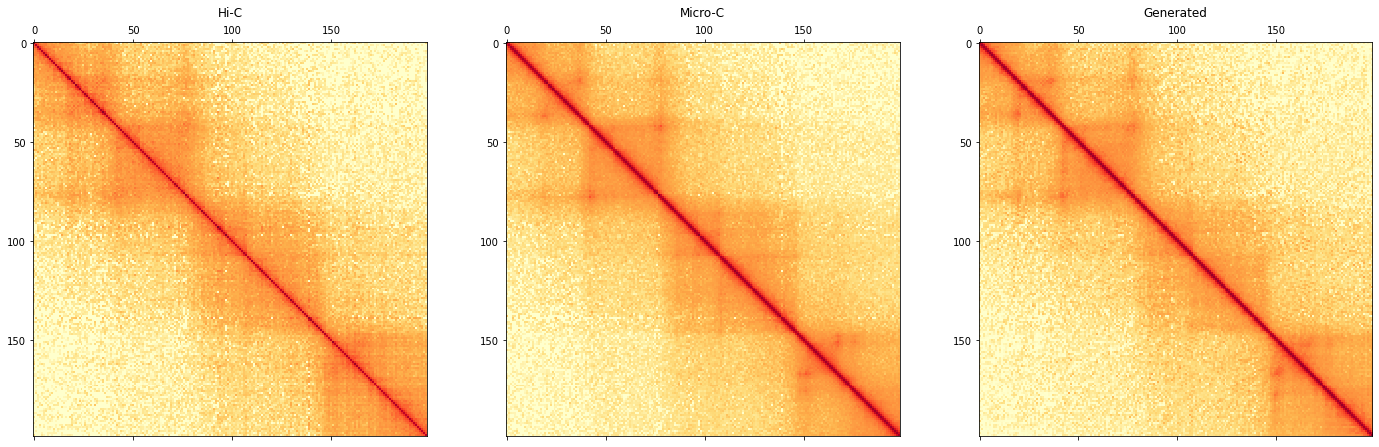

In [63]:
fig = plot_figures(netG, train, target, k=2014, device=device, start=0, end=-1)
fig.savefig('figures/H1_full_fig4.svg', dpi=100)

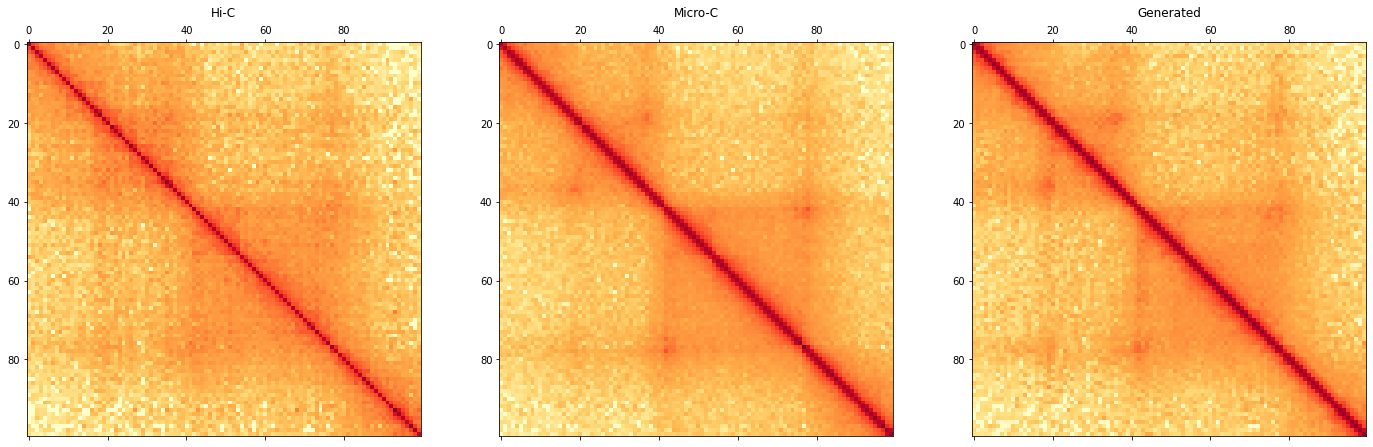

In [54]:
fig = plot_figures(netG, train, target, k=2014, device=device, start=0, end=100)
fig.savefig('figures/H1_zoom_fig4.svg', dpi=100)

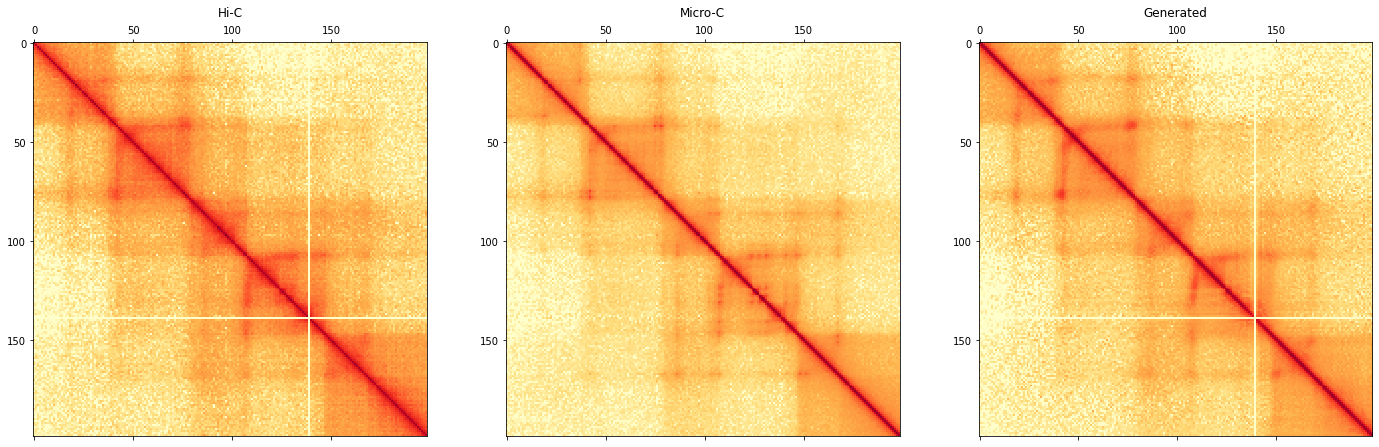

In [55]:
fig = plot_figures(netG, hff_hic, hff_microc, k=2014, device=device, start=0, end=-1)
fig.savefig('figures/HFF_full_fig4.svg', dpi=100)

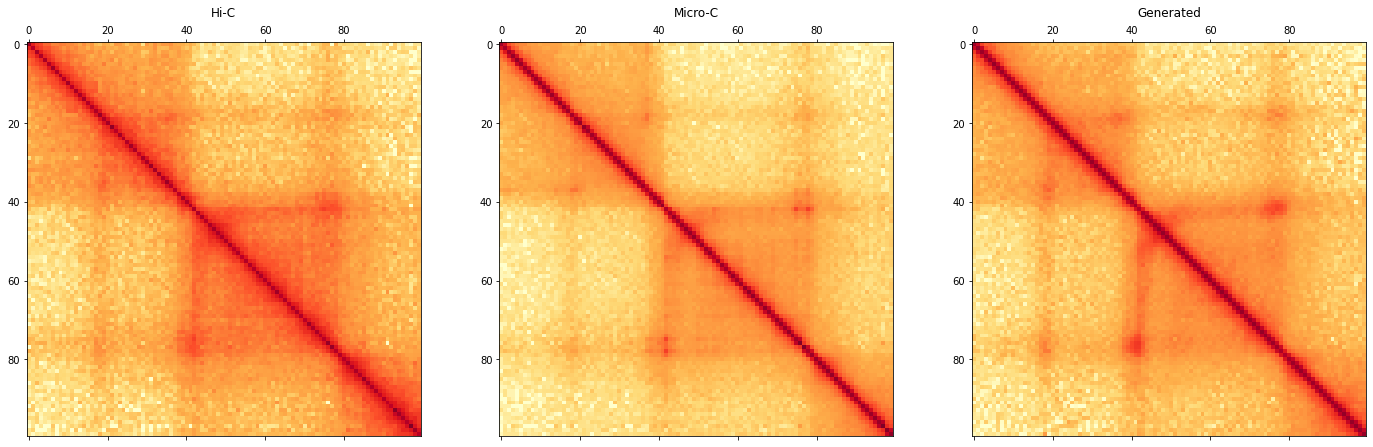

In [56]:
fig=plot_figures(netG, hff_hic, hff_microc, k=2014, device=device, start=0, end=100)
fig.savefig('figures/HFF_zoom_fig4.svg', dpi=100)

In [144]:
k = 4000
print(regions_df.iloc[k].chrom+':'+str(regions_df.iloc[k].start)+'-'+str(regions_df.iloc[k].end))

chr5:55650000-56650000


In [147]:
55650000+750000

56400000

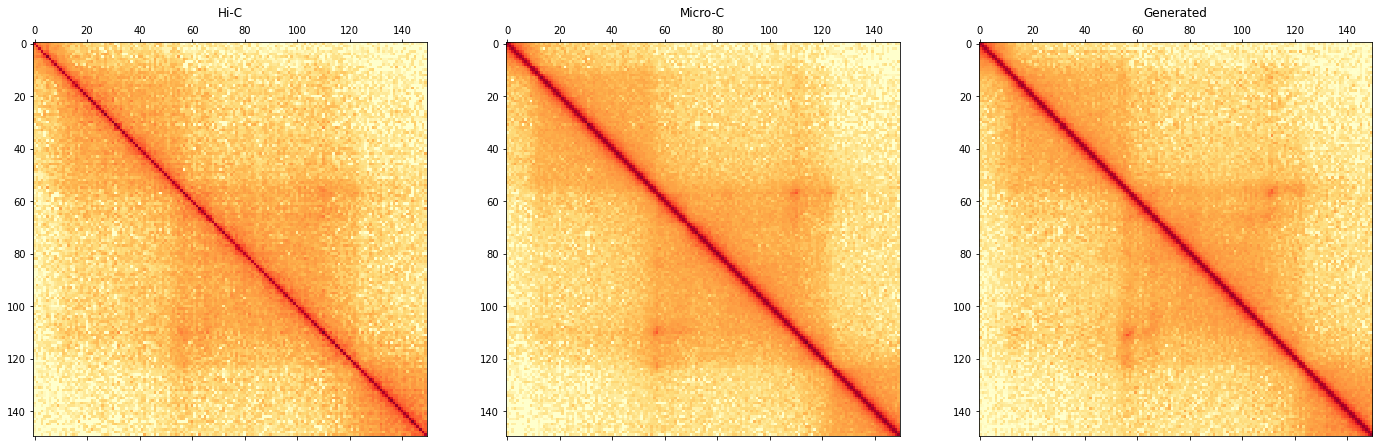

In [99]:
fig=plot_figures(netG, train, target, k=4000, device=device, start=0, end=150)
fig.savefig('figures/H1_complex.svg', dpi=100)

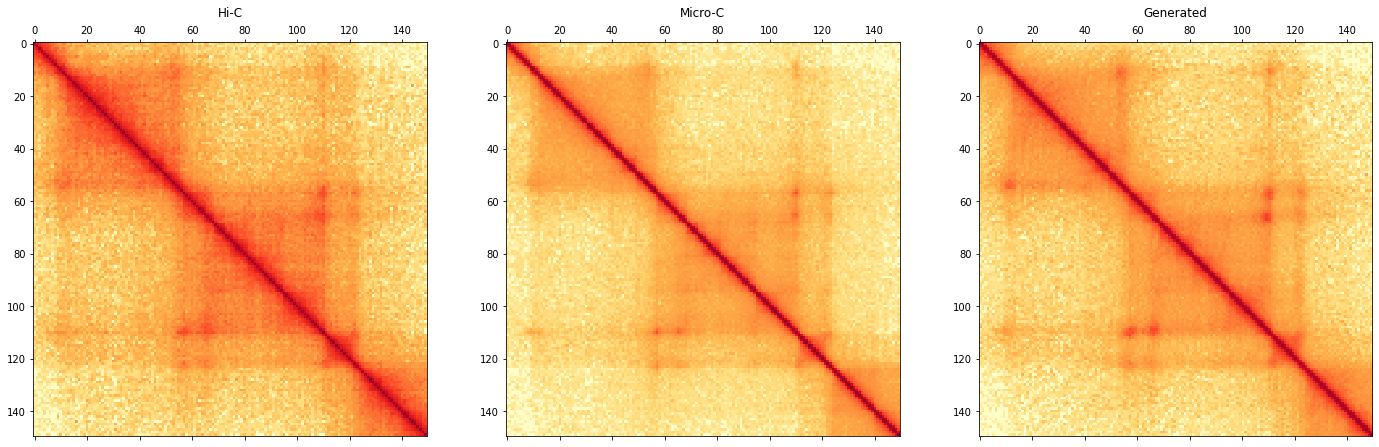

In [100]:
fig=plot_figures(netG, hff_hic, hff_microc, k=4000, device=device, start=0, end=150)
fig.savefig('figures/HFF_complex.svg', dpi=100)

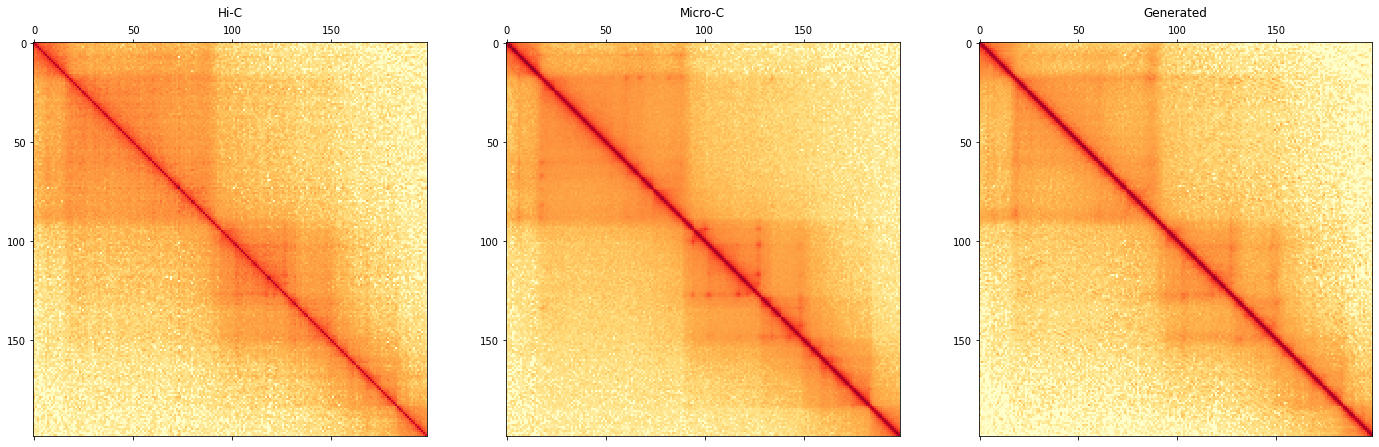

In [102]:
fig=plot_figures(netG, train, target, k=5, device=device, start=0, end=-1)

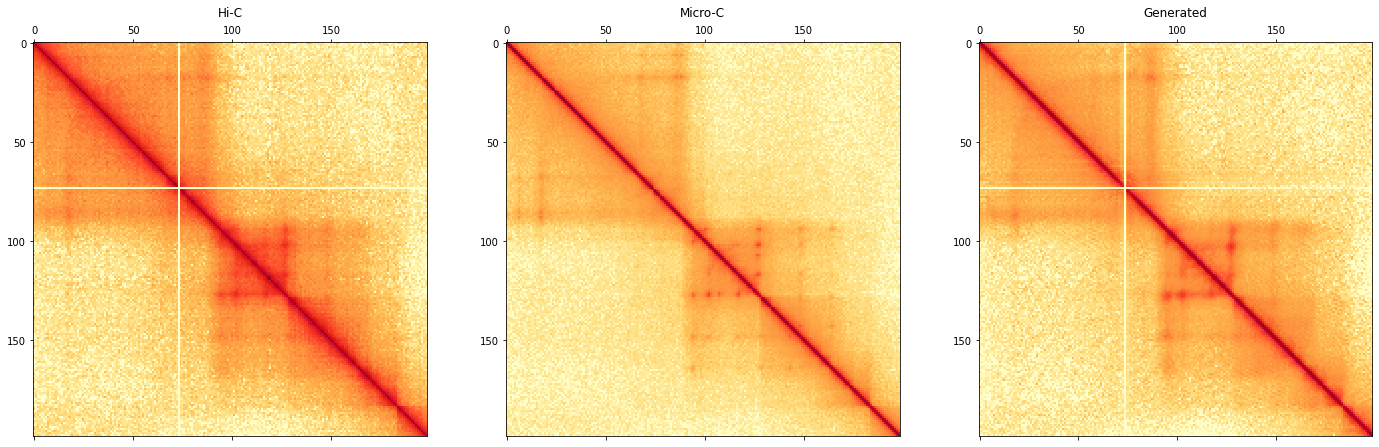

In [101]:
fig=plot_figures(netG, hff_hic, hff_microc, k=5, device=device, start=0, end=-1)

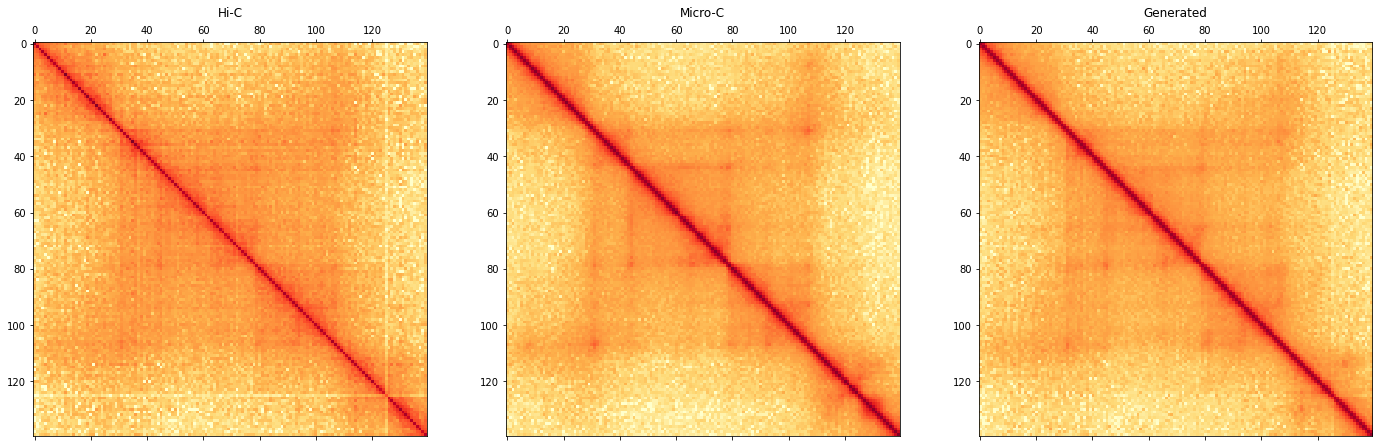

In [95]:
fig = plot_figures(netG, train, target, k=1781, device=device, start=0, end=140)
fig.savefig('figures/comparison_fig_model_H1.svg', dpi=100)

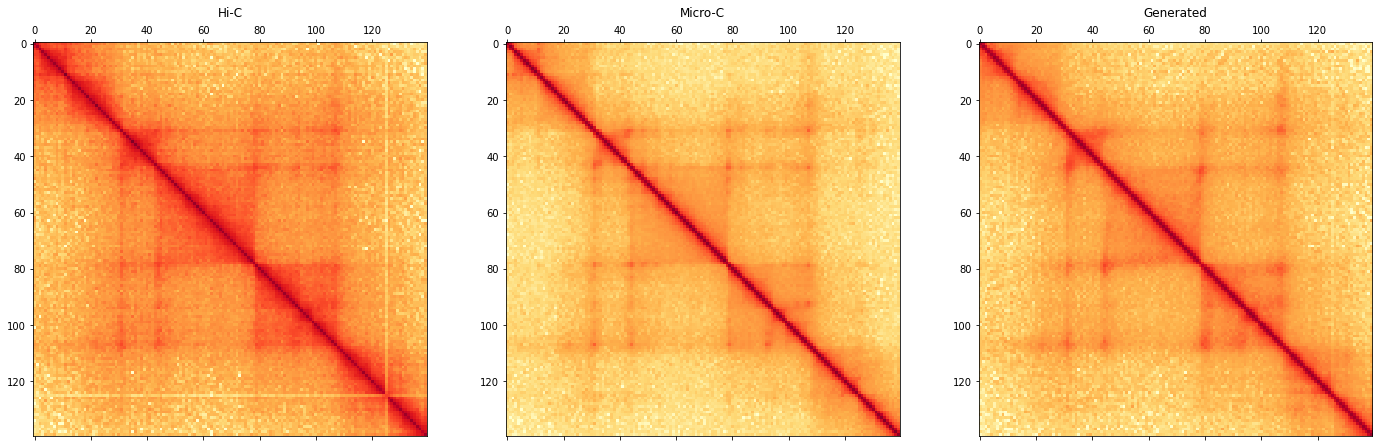

In [94]:
fig = plot_figures(netG, hff_hic, hff_microc, k=1781, device=device, start=0, end=140)
fig.savefig('figures/comparison_fig_model_hff.svg', dpi=100)

In [86]:
regions_df.loc[1780:]

,chrom,start,end
1780,chr2,201443750,202443750
1781,chr2,201643750,202643750
1782,chr2,201843750,202843750
1783,chr2,202043750,203043750
1784,chr2,202243750,203243750
...,...,...,...
11742,chr22,48800000,49800000
11743,chr22,49000000,50000000
11744,chr22,49200000,50200000
11745,chr22,49400000,50400000


## Use old coolers


In [140]:
IMR90 = cooler.Cooler('data/4DNFIJTOIGOI.mcool::resolutions/5000')
GM = cooler.Cooler('data/4DNFIXP4QG5B.mcool::resolutions/5000')

In [137]:
def plot_figures2(model, mcool, k, device, start=0, end=-1):

  hic = process_mat(mcool.matrix(balance=True).fetch(regions_df.iloc[k]))
  predicted_mats = model(torch.Tensor(hic[None,None,:, :])).data.cpu().numpy()
  fig = plt.figure(figsize=(10, 6))
  ax1 = plt.subplot(1,2,1)
  ax1.set_title('Hi-C')

  ax1.matshow(hic[start:end,start:end], cmap='YlOrRd', vmin=0, vmax=1)

  ax2 = plt.subplot(1,2,2)
  ax2.set_title('Generated')
  ax2.matshow(predicted_mats[0, 0][start:end,start:end], cmap='YlOrRd', vmin=0, vmax=1)

  return fig

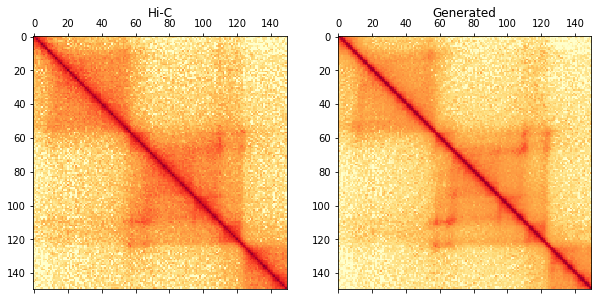

In [148]:
fig = plot_figures2(netG, IMR90, k=4000, device=device, start=0, end=150)
fig.savefig('figures/IMR90.svg', dpi=100)

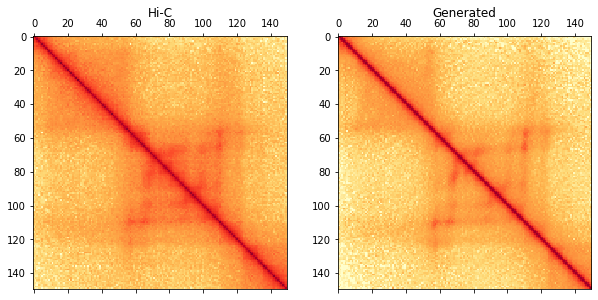

In [149]:
fig = plot_figures2(netG, GM, k=4000, device=device, start=0, end=150)
fig.savefig('figures/GM12878.svg', dpi=100)